In [1]:
!pip install geopy
!conda install -c conda-forge folium=0.5.0 --yes 

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
%matplotlib inline 
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print('Libraries imported.')

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    brotlipy-0.7.0             |py36h8c4c3a4_1000         346 KB  conda-forge
    ca-certificates-2020.4.5.2 |       hecda079_0         147 KB  conda-forge
    certifi-2020.4.5.2         |   py36h9f0ad1d_0         152 KB  conda-forge
    chardet-3.0.4              |py36h9f0ad1d_1006         188 KB  conda-forge
    cryptography-2.9.2         |   py36h45558ae_0         613 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-

In [2]:
paris_data = pd.read_csv("https://lvdesign.com.fr/coursera_data/paris.csv")
paris_data

,Lieux,Latitude,Longitude
0,Musée du Louvre,48.860611,2.335450
1,Notre Dame de Paris,48.852968,2.347708
2,Arc de Triomphe,48.873792,2.295028
3,Tour Eiffel,48.858370,2.294481


In [3]:
address = 'Paris, FR'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Paris are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Paris are 48.8566969, 2.3514616.


In [4]:
map_Paris = folium.Map(location=[latitude, longitude], zoom_start=13)

# add markers to map
for lat, lng, label in zip(paris_data['Latitude'], paris_data['Longitude'], paris_data['Lieux']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Paris)  
    
map_Paris

In [5]:
CLIENT_ID = 'XDP05EROIGY2VHJ3RZNRVGCEECJKCBAV0L4JMC4F4SCL0NAF' # your Foursquare ID
CLIENT_SECRET = 'XHKK22SSQYX0REMVWFGNG3GTY5I2HGPPOUERFOEFPIR0YPNO' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: XDP05EROIGY2VHJ3RZNRVGCEECJKCBAV0L4JMC4F4SCL0NAF
CLIENT_SECRET:XHKK22SSQYX0REMVWFGNG3GTY5I2HGPPOUERFOEFPIR0YPNO


In [6]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT=200):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng,            
            v['venue']['name'], 
            v['venue']['id'],
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Lieux', 
                  'Lieux Latitude', 
                  'Lieux Longitude', 
                  'Venue',
                  'Venue id',                
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category'
                             
                   ]
    
    return(nearby_venues)

In [7]:
venue_id ={
    'Musée du Louvre': '4adcda10f964a520af3521e3',
    'Cathédrale Notre-Dame de Paris': '4adcda09f964a520e83321e3',
    'Tour Eiffel': '51a2445e5019c80b56934c75',
    'Arc de Triomphe': '4adcda09f964a520de3321e3'
}

for key,value in venue_id.items():
    
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(value, CLIENT_ID, CLIENT_SECRET, VERSION)
    result = requests.get(url).json()
    try:
        print('Venue :', key)
        print('Rating : ', result['response']['venue']['rating'])
        print('Total Tips : ', result['response']['venue']['tips']['count'])
        print('Nb Likes : ', result['response']['venue']['tips']['groups'][0]['items'][0]['likes']['count'])
        print('Nb Likes / Total Tips', (result['response']['venue']['tips']['groups'][0]['items'][0]['likes']['count'])/ (result['response']['venue']['tips']['count']) *100 )
        
        print()

    except:
        print('This venue has not been rated yet.')

Venue : Musée du Louvre
Rating :  9.3
Total Tips :  2266
Nb Likes :  167
Nb Likes / Total Tips 7.369814651368049

Venue : Cathédrale Notre-Dame de Paris
Rating :  9.3
Total Tips :  978
Nb Likes :  57
Nb Likes / Total Tips 5.828220858895705

Venue : Tour Eiffel
Rating :  9.4
Total Tips :  2651
Nb Likes :  933
Nb Likes / Total Tips 35.194266314598266

Venue : Arc de Triomphe
Rating :  9.4
Total Tips :  774
Nb Likes :  102
Nb Likes / Total Tips 13.178294573643413



In [8]:
paris_data_venues = getNearbyVenues(names=paris_data['Lieux'],
                                   latitudes=paris_data['Latitude'],
                                   longitudes=paris_data['Longitude']
                                  )
#print(paris_data_venues.shape)
paris_data_venues

Musée du Louvre
Notre Dame de Paris
Arc de Triomphe
Tour Eiffel


,Lieux,Lieux Latitude,Lieux Longitude,Venue,Venue id,Venue Latitude,Venue Longitude,Venue Category
0,Musée du Louvre,48.860611,2.335450,Musée du Louvre,4adcda10f964a520af3521e3,48.860847,2.336440,Art Museum
1,Musée du Louvre,48.860611,2.335450,La Vénus de Milo (Vénus de Milo),5864efb745c3ed1e7d88e96d,48.859943,2.337234,Exhibit
2,Musée du Louvre,48.860611,2.335450,Vestige de la Forteresse du Louvre,4f6dabf5003944083fe0002e,48.861577,2.333508,Historic Site
3,Musée du Louvre,48.860611,2.335450,Cour Carrée du Louvre,4c079d740ed3c928b6be797d,48.860360,2.338543,Pedestrian Plaza
4,Musée du Louvre,48.860611,2.335450,Cour Napoléon,5072efe7e4b0c34b5146e7fd,48.861172,2.335088,Plaza
5,Musée du Louvre,48.860611,2.335450,"Pavillon des Sessions – Arts d'Afrique, d'Asie...",588ba9a9fc5a5f18a36a2a05,48.860724,2.332121,Art Museum
6,Musée du Louvre,48.860611,2.335450,Place du Palais Royal,4b071505f964a520dcf622e3,48.862523,2.336688,Plaza
7,Musée du Louvre,48.860611,2.335450,Pont des Arts,4adcda09f964a520ff3321e3,48.858565,2.337635,Bridge
8,Musée du Louvre,48.860611,2.335450,Comédie-Française,4b48b4b0f964a5207c5326e3,48.863088,2.336612,Theater
9,Musée du Louvre,48.860611,2.335450,LouLou,57421b43498eb3b82c128e67,48.862804,2.333500,Italian Restaurant


In [9]:
df_view_new = paris_data_venues.groupby('Lieux').count()
df_paris_histo = df_view_new['Venue Category']
df_paris_histo

Lieux
Arc de Triomphe        75
Musée du Louvre        57
Notre Dame de Paris    72
Tour Eiffel            49
Name: Venue Category, dtype: int64

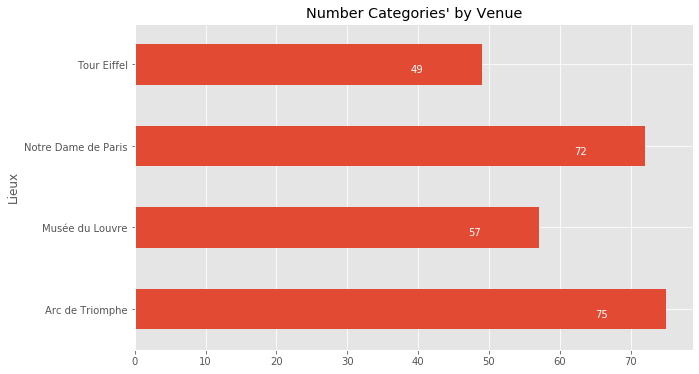

In [10]:
df_paris_histo.plot(kind='barh', figsize=(10,6))

#plt.xlabel('name') # add to x-label to the plot
#plt.ylabel('Number de categories') # add y-label to the plot
plt.title('Number Categories\' by Venue') # add title to the plot

for index, value in enumerate(df_paris_histo): 
    label = format(int(value), ',') 
    plt.annotate(label, xy=(value - 10, index - 0.10), color='white')
    
plt.show()

In [11]:
paris_onehot = pd.get_dummies(paris_data_venues[['Venue Category']], prefix="", prefix_sep="")

# add Lieux column back to dataframe
paris_onehot['Lieux'] = paris_data_venues['Lieux'] 

# move lieux column to the first column
fixed_columns = [paris_onehot.columns[-1]] + list(paris_onehot.columns[:-1])
paris_onehot = paris_onehot[fixed_columns]

paris_onehot

,Lieux,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Bagel Shop,Bakery,Bar,Basketball Court,Beach Bar,Beer Bar,Bistro,Bookstore,Boutique,Brasserie,Breton Restaurant,Bridge,Burger Joint,Café,Candy Store,Champagne Bar,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comic Shop,Convenience Store,Cosmetics Shop,Creperie,Deli / Bodega,Dessert Shop,Diner,Electronics Store,Exhibit,Falafel Restaurant,Flower Shop,Fountain,French Restaurant,Furniture / Home Store,Garden,Historic Site,History Museum,Hobby Shop,Hotel,Ice Cream Shop,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Jewelry Store,Kebab Restaurant,Kids Store,Lebanese Restaurant,Library,Market,Men's Store,Mexican Restaurant,Miscellaneous Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Nightclub,Park,Pastry Shop,Pedestrian Plaza,Perfume Shop,Pizza Place,Playground,Plaza,Pub,Restaurant,Romanian Restaurant,Roof Deck,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Smoke Shop,Spa,Sports Bar,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Theater,Theme Park Ride / Attraction,Tourist Information Center,Toy / Game Store,Track,Train Station,Udon Restaurant,Vegetarian / Vegan Restaurant
0,Musée du Louvre,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Musée du Louvre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Musée du Louvre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Musée du Louvre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Musée du Louvre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Musée du Louvre,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Musée du Louvre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Musée du Louvre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Musée du Louvre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9,Musée du Louvre,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
paris_grouped = paris_onehot.groupby('Lieux').mean().reset_index()
paris_grouped

,Lieux,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Bagel Shop,Bakery,Bar,Basketball Court,Beach Bar,Beer Bar,Bistro,Bookstore,Boutique,Brasserie,Breton Restaurant,Bridge,Burger Joint,Café,Candy Store,Champagne Bar,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comic Shop,Convenience Store,Cosmetics Shop,Creperie,Deli / Bodega,Dessert Shop,Diner,Electronics Store,Exhibit,Falafel Restaurant,Flower Shop,Fountain,French Restaurant,Furniture / Home Store,Garden,Historic Site,History Museum,Hobby Shop,Hotel,Ice Cream Shop,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Jewelry Store,Kebab Restaurant,Kids Store,Lebanese Restaurant,Library,Market,Men's Store,Mexican Restaurant,Miscellaneous Shop,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Nightclub,Park,Pastry Shop,Pedestrian Plaza,Perfume Shop,Pizza Place,Playground,Plaza,Pub,Restaurant,Romanian Restaurant,Roof Deck,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Smoke Shop,Spa,Sports Bar,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Theater,Theme Park Ride / Attraction,Tourist Information Center,Toy / Game Store,Track,Train Station,Udon Restaurant,Vegetarian / Vegan Restaurant
0,Arc de Triomphe,0.000000,0.000000,0.013333,0.000000,0.013333,0.026667,0.000000,0.000000,0.000000,0.000000,0.013333,0.000000,0.013333,0.000000,0.013333,0.000000,0.000000,0.013333,0.013333,0.000000,0.000000,0.000000,0.000000,0.000000,0.026667,0.013333,0.000000,0.013333,0.000000,0.013333,0.013333,0.013333,0.013333,0.000000,0.000000,0.026667,0.000000,0.000000,0.000000,0.000000,0.160000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.080000,0.026667,0.026667,0.013333,0.013333,0.000000,0.000000,0.000000,0.013333,0.000000,0.000000,0.013333,0.000000,0.013333,0.026667,0.000000,0.013333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013333,0.000000,0.000000,0.000000,0.013333,0.026667,0.013333,0.000000,0.000000,0.000000,0.000000,0.000000,0.013333,0.000000,0.026667,0.000000,0.013333,0.000000,0.000000,0.000000,0.000000,0.013333,0.000000,0.000000,0.000000,0.000000,0.013333
1,Musée du Louvre,0.052632,0.017544,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017544,0.017544,0.017544,0.000000,0.017544,0.000000,0.035088,0.000000,0.000000,0.000000,0.000000,0.000000,0.017544,0.017544,0.000000,0.035088,0.000000,0.000000,0.000000,0.035088,0.000000,0.000000,0.017544,0.000000,0.000000,0.017544,0.000000,0.000000,0.000000,0.157895,0.017544,0.017544,0.052632,0.000000,0.000000,0.087719,0.000000,0.000000,0.035088,0.035088,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017544,0.000000,0.017544,0.000000,0.017544,0.017544,0.000000,0.000000,0.070175,0.000000,0.000000,0.000000,0.000000,0.017544,0.000000,0.000000,0.000000,0.017544,0.017544,0.017544,0.017544,0.000000,0.000000,0.000000,0.000000,0.000000,0.017544,0.017544,0.000000,0.000000,0.000000,0.000000,0.000000,0.017544,0.000000
2,Notre Dame de Paris,0.000000,0.013889,0.000000,0.000000,0.000000,0.041667,0.027778,0.000000,0.000000,0.013889,0.041667,0.069444,0.000000,0.000000,0.000000,0.000000,0.027778,0.000000,0.000000,0.000000,0.013889,0.000000,0.013889,0.013889,0.000000,0.013889,0.041667,0.000000,0.013889,0.000000,0.000000,0.000000,0.000000,0.000000,0.013889,0.000000,0.000000,0.013889,0.027778,0.013889,0.111111,0.000000,0.013889,0.013889,0.013889,0.013889,0.027778,0.027778,0.041667,0.000000,0.027778,0.000000,0.000000,0.000000,0.027778,0.000000,0.013889,0.013889,0.013889,0.013889,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013889,0.013889,0.013889,0.000000,0.000000,0.000000,0.055556,0.013889,0.000000,0.000000,0.000000,0.000000,0.000000,0.013889,0.013889,0.000000,0.000000,0.000000,0.000000,0.013889,0.000000,0.013889,0.000000,0.013889,

In [14]:
num_top_venues = 10

for hood in paris_grouped['Lieux']:
    print("----"+hood+"----")
    temp = paris_grouped[paris_grouped['Lieux'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Arc de Triomphe----
                 venue  freq
0                Hotel  0.20
1    French Restaurant  0.16
2   Italian Restaurant  0.08
3       Clothing Store  0.03
4           Steakhouse  0.03
5               Bakery  0.03
6    Electronics Store  0.03
7       Sandwich Place  0.03
8  Japanese Restaurant  0.03
9        Movie Theater  0.03


----Musée du Louvre----
                 venue  freq
0    French Restaurant  0.16
1                Hotel  0.09
2                Plaza  0.07
3           Art Museum  0.05
4        Historic Site  0.05
5                 Café  0.04
6  Japanese Restaurant  0.04
7       Cosmetics Shop  0.04
8          Coffee Shop  0.04
9   Italian Restaurant  0.04


----Notre Dame de Paris----
                 venue  freq
0    French Restaurant  0.11
1            Bookstore  0.07
2                Plaza  0.06
3               Bistro  0.04
4  Indie Movie Theater  0.04
5               Bakery  0.04
6          Coffee Shop  0.04
7                Hotel  0.03
8         Burger Join

In [15]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [16]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Lieux']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
lieux_venues_sorted = pd.DataFrame(columns=columns)
lieux_venues_sorted['Lieux'] = paris_grouped['Lieux']

for ind in np.arange(paris_grouped.shape[0]):
    lieux_venues_sorted.iloc[ind, 1:] = return_most_common_venues(paris_grouped.iloc[ind, :], num_top_venues)

lieux_venues_sorted

,Lieux,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arc de Triomphe,Hotel,French Restaurant,Italian Restaurant,Clothing Store,Jewelry Store,Japanese Restaurant,Sandwich Place,Electronics Store,Steakhouse,Movie Theater
1,Musée du Louvre,French Restaurant,Hotel,Plaza,Art Museum,Historic Site,Café,Coffee Shop,Cosmetics Shop,Japanese Restaurant,Italian Restaurant
2,Notre Dame de Paris,French Restaurant,Bookstore,Plaza,Coffee Shop,Bakery,Indie Movie Theater,Bistro,Lebanese Restaurant,Hotel,Flower Shop
3,Tour Eiffel,French Restaurant,Italian Restaurant,Hotel,Bakery,Café,Garden,Plaza,Playground,Pizza Place,Pedestrian Plaza


In [17]:
kclusters = 4

paris_grouped_clustering = paris_grouped.drop('Lieux', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(paris_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 3, 1, 2], dtype=int32)

In [18]:
paris_merged = paris_data

# add clustering labels
paris_merged['Cluster Labels'] = kmeans.labels_

paris_merged = paris_merged.join(lieux_venues_sorted.set_index('Lieux'), on='Lieux')
paris_merged 

,Lieux,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Musée du Louvre,48.860611,2.335450,0,French Restaurant,Hotel,Plaza,Art Museum,Historic Site,Café,Coffee Shop,Cosmetics Shop,Japanese Restaurant,Italian Restaurant
1,Notre Dame de Paris,48.852968,2.347708,3,French Restaurant,Bookstore,Plaza,Coffee Shop,Bakery,Indie Movie Theater,Bistro,Lebanese Restaurant,Hotel,Flower Shop
2,Arc de Triomphe,48.873792,2.295028,1,Hotel,French Restaurant,Italian Restaurant,Clothing Store,Jewelry Store,Japanese Restaurant,Sandwich Place,Electronics Store,Steakhouse,Movie Theater
3,Tour Eiffel,48.858370,2.294481,2,French Restaurant,Italian Restaurant,Hotel,Bakery,Café,Garden,Plaza,Playground,Pizza Place,Pedestrian Plaza


In [19]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**3 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(paris_merged['Latitude'], paris_merged['Longitude'], paris_merged['Lieux'], paris_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color='black',
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [20]:
paris_merged.loc[paris_merged['Cluster Labels'] == 0, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,48.860611,Hotel,Plaza,Art Museum,Historic Site,Café,Coffee Shop,Cosmetics Shop,Japanese Restaurant,Italian Restaurant


In [21]:
paris_merged.loc[paris_merged['Cluster Labels'] == 1, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,48.873792,French Restaurant,Italian Restaurant,Clothing Store,Jewelry Store,Japanese Restaurant,Sandwich Place,Electronics Store,Steakhouse,Movie Theater


In [22]:
paris_merged.loc[paris_merged['Cluster Labels'] == 2, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,48.85837,Italian Restaurant,Hotel,Bakery,Café,Garden,Plaza,Playground,Pizza Place,Pedestrian Plaza


In [23]:
paris_merged.loc[paris_merged['Cluster Labels'] == 3, paris_merged.columns[[1] + list(range(5, paris_merged.shape[1]))]]

,Latitude,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,48.852968,Bookstore,Plaza,Coffee Shop,Bakery,Indie Movie Theater,Bistro,Lebanese Restaurant,Hotel,Flower Shop


In [24]:
lieux_latitude = paris_data.loc[3, 'Latitude'] # lieux latitude value
lieux_longitude = paris_data.loc[3, 'Longitude'] # Lieux  longitude value

lieux_name = paris_data.loc[3, 'Lieux'] # Lieux name

print('Latitude and longitude values of {} are {}, {}.'.format(lieux_name, 
                                                               lieux_latitude, 
                                                               lieux_longitude))

Latitude and longitude values of Tour Eiffel are 48.8583701, 2.2944812999999997.


In [25]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
# type your answer here
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID,CLIENT_SECRET,VERSION,lieux_latitude,lieux_longitude,radius,LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=XDP05EROIGY2VHJ3RZNRVGCEECJKCBAV0L4JMC4F4SCL0NAF&client_secret=XHKK22SSQYX0REMVWFGNG3GTY5I2HGPPOUERFOEFPIR0YPNO&v=20180605&ll=48.8583701,2.2944812999999997&radius=500&limit=100'

In [26]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ee5c6e5dc59643ef448511e'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Tour Eiffel - Parc du Champ-de-Mars',
  'headerFullLocation': 'Tour Eiffel - Parc du Champ-de-Mars, Paris',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 49,
  'suggestedBounds': {'ne': {'lat': 48.862870104500004,
    'lng': 2.301308246677155},
   'sw': {'lat': 48.8538700955, 'lng': 2.2876543533228446}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '51a2445e5019c80b56934c75',
       'name': 'Tour Eiffel',
       'location': {'address': '5 avenue Anatole France',
        'lat': 48.85825817805569,
        'lng': 2.294423282146454,
        'labeledLatLn

In [27]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [28]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng', 'venue.id']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng,id
0,Tour Eiffel,Monument / Landmark,48.858258,2.294423,51a2445e5019c80b56934c75
1,Restaurant 58 Tour Eiffel,French Restaurant,48.858366,2.294249,4e078807e4cdefcff6dce4f6
2,Sommet de la Tour Eiffel,Scenic Lookout,48.858331,2.294501,58c41f2b0e0a1e57d8dc841c
3,Le Jules Verne,French Restaurant,48.858245,2.294530,4b5972b9f964a5208b8828e3
4,Bar à Champagne,Champagne Bar,48.858313,2.294411,4d55537db4deb1f71d41037a
5,Carrousel de la Tour Eiffel,Theme Park Ride / Attraction,48.858972,2.292631,4dab1ab0fa8cc76497446a89
6,Residence Charles Floquet,Hotel,48.856306,2.294318,54c57345498e47f3d60203c7
7,Musée du Quai Branly – Jacques Chirac,Art Museum,48.860849,2.297423,4adcda10f964a520ae3521e3
8,Place Jacques Rueff,Plaza,48.856183,2.298007,5427e002498e8525dc98dd65
9,Capriccio Sorrentino,Italian Restaurant,48.859208,2.297896,50b60a4ee4b0c55f394cee7a


In [29]:
venue_id = '51a2445e5019c80b56934c75' # Tour Eiffel 51a2445e5019c80b56934c75
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print('Rating : ', result['response']['venue']['rating'])
    print('Total Tips : ', result['response']['venue']['tips']['count'])
    print('Nb Likes : ', result['response']['venue']['tips']['groups'][0]['items'][0]['likes']['count'])
    print('Nb Likes / Total Tips', (result['response']['venue']['tips']['groups'][0]['items'][0]['likes']['count'])/ (result['response']['venue']['tips']['count']) *100 )
except:
    print('This venue has not been rated yet.')

Rating :  9.4
Total Tips :  2651
Nb Likes :  933
Nb Likes / Total Tips 35.194266314598266


In [30]:
venue_id = '51a2445e5019c80b56934c75'
limit = 200 # set limit to be greater than or equal to the total number of tips
url = 'https://api.foursquare.com/v2/venues/{}/tips?client_id={}&client_secret={}&v={}&limit={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION, limit)

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ee5c89be5ec386ad32ec1e3'},
 'response': {'tips': {'count': 2651,
   'items': [{'id': '51dacd8c498e81059bd6817e',
     'createdAt': 1373293964,
     'text': 'Apparently the Eiffel Tower grows in summer! Made of iron, it expands with heat & can get more than 15 cm taller.',
     'type': 'user',
     'canonicalUrl': 'https://foursquare.com/item/51dacd8c498e81059bd6817e',
     'photo': {'id': '51dacd8e7dd24494a9f55740',
      'createdAt': 1373293966,
      'source': {'name': 'Foursquare Web', 'url': 'https://foursquare.com'},
      'prefix': 'https://fastly.4sqi.net/img/general/',
      'suffix': '/2960181_QytskOzX9KNE4z9ifAJtXTjT6YE6Zqc_volw8k3mSzE.jpg',
      'width': 755,
      'height': 960,
      'visibility': 'public'},
     'photourl': 'https://fastly.4sqi.net/img/general/original/2960181_QytskOzX9KNE4z9ifAJtXTjT6YE6Zqc_volw8k3mSzE.jpg',
     'lang': 'en',
     'likes': {'count': 933,
      'groups': [{'type': 'others', 'count': 933, 'items': []

In [31]:
tips = results['response']['tips']['items']

tip = results['response']['tips']['items'][0]
tip.keys()

dict_keys(['id', 'createdAt', 'text', 'type', 'canonicalUrl', 'photo', 'photourl', 'lang', 'likes', 'logView', 'agreeCount', 'disagreeCount', 'todo', 'user'])

In [40]:
pd.set_option('display.max_colwidth', -1)

tips_df = json_normalize(tips) # json normalize tips

# columns to keep
filtered_columns = ['text', 'agreeCount', 'disagreeCount', 'id', 'user.firstName', 'user.lastName', 'user.gender', 'user.id']
tips_filtered = tips_df[ filtered_columns]

# display tips
tips_filtered

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


KeyError: "['user.lastName', 'user.gender'] not in index"

In [33]:
LIMIT = 150 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=XDP05EROIGY2VHJ3RZNRVGCEECJKCBAV0L4JMC4F4SCL0NAF&client_secret=XHKK22SSQYX0REMVWFGNG3GTY5I2HGPPOUERFOEFPIR0YPNO&ll=48.8566969,2.3514616&v=20180605&radius=500&limit=150'

In [41]:
results = requests.get(url).json()
'There are {} popular spots around.'.format(len(results['response']['groups'][0]['items']))

'There are 100 popular spots around.'

In [42]:
items = results['response']['groups'][0]['items']
items[0]

{'reasons': {'count': 0,
  'items': [{'summary': 'This spot is popular',
    'type': 'general',
    'reasonName': 'globalInteractionReason'}]},
 'venue': {'id': '4bf41231e5eba59334341f90',
  'name': "Place de l'Hôtel de Ville – Esplanade de la Libération",
  'location': {'address': "Place de l'Hôtel de Ville",
   'lat': 48.85692475726913,
   'lng': 2.3514118156673676,
   'distance': 25,
   'postalCode': '75004',
   'cc': 'FR',
   'city': 'Paris',
   'state': 'Île-de-France',
   'country': 'France',
   'formattedAddress': ["Place de l'Hôtel de Ville", '75004 Paris', 'France']},
  'categories': [{'id': '4bf58dd8d48988d164941735',
    'name': 'Plaza',
    'pluralName': 'Plazas',
    'shortName': 'Plaza',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/plaza_',
     'suffix': '.png'},
    'primary': True}],
  'photos': {'count': 0, 'groups': []}},
 'referralId': 'e-0-4bf41231e5eba59334341f90-0'}

In [43]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [44]:
dataframe = json_normalize(items) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

dataframe_filtered.head(10)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


,name,categories,address,lat,lng,distance,postalCode,cc,city,state,country,formattedAddress,labeledLatLngs,crossStreet,neighborhood,id
0,Place de l'Hôtel de Ville – Esplanade de la Libération,Plaza,Place de l'Hôtel de Ville,48.856925,2.351412,25,75004,FR,Paris,Île-de-France,France,"[Place de l'Hôtel de Ville, 75004 Paris, France]",NaN,NaN,NaN,4bf41231e5eba59334341f90
1,Berges de Seine – Rive droite,Pedestrian Plaza,De la passerelle Léopold-Sédar-Senghor au port de l'Arsenal,48.855131,2.352289,184,NaN,FR,Paris,Île-de-France,France,"[De la passerelle Léopold-Sédar-Senghor au port de l'Arsenal, Paris, France]","[{'label': 'display', 'lat': 48.855130568830376, 'lng': 2.352289446225441}]",NaN,NaN,58d800df9435a979b8a645fa
2,Parc Rives de Seine,Park,Quais de Seine,48.855510,2.351419,132,75000,FR,Paris,Île-de-France,France,"[Quais de Seine, 75000 Paris, France]","[{'label': 'display', 'lat': 48.85551048052973, 'lng': 2.3514188826084137}]",NaN,NaN,58e0f18f561ded7abcbbbd01
3,Maison Aleph,Pastry Shop,20 rue de la Verrerie,48.857348,2.354873,260,75004,FR,Paris,Île-de-France,France,"[20 rue de la Verrerie, 75004 Paris, France]","[{'label': 'display', 'lat': 48.857348, 'lng': 2.354873}]",NaN,NaN,59247f4e0d2be70573edd834
4,Tour Saint-Jacques,Historic Site,88 rue de Rivoli,48.858031,2.348875,240,75004,FR,Paris,Île-de-France,France,"[88 rue de Rivoli, 75004 Paris, France]","[{'label': 'display', 'lat': 48.858030532545826, 'lng': 2.348874807357788}]",NaN,NaN,4b5c7d1ff964a5205f3229e3
5,Square de la Tour Saint-Jacques,Park,88 rue de Rivoli,48.857882,2.348757,238,75001,FR,Paris,Île-de-France,France,"[88 rue de Rivoli, 75001 Paris, France]","[{'label': 'display', 'lat': 48.857882297703746, 'lng': 2.348756790161133}]",NaN,NaN,4dbd336b6a23e294ba405cfa
6,BHV Marais,Department Store,52 rue de Rivoli,48.857312,2.353633,173,75004,FR,Paris,Île-de-France,France,"[52 rue de Rivoli (Rue de Rivoli), 75004 Paris, France]","[{'label': 'display', 'lat': 48.8573123, 'lng': 2.3536331}]",Rue de Rivoli,NaN,4b4b6a3df964a520b89a26e3
7,Galerie Azzedine Alaïa,Art Gallery,18 rue de la Verrerie,48.857545,2.355217,290,75003,FR,Paris,Île-de-France,France,"[18 rue de la Verrerie, 75003 Paris, France]","[{'label': 'display', 'lat': 48.857544773243966, 'lng': 2.3552169725375203}]",NaN,NaN,4c0bc2fdbbc676b018f64bd5
8,Fleux',Furniture / Home Store,39 et 52 rue Sainte-Croix de la Bretonnerie,48.858763,2.354161,303,75004,FR,Paris,Île-de-France,France,"[39 et 52 rue Sainte-Croix de la Bretonnerie, 75004 Paris, France]","[{'label': 'display', 'lat': 48.85876287681194, 'lng': 2.3541614413261414}]",NaN,NaN,4b533b45f964a520509327e3
9,Huygens Cosmetique Naturelle Sur Mesure,Cosmetics Shop,24 rue Du Temple,48.858938,2.353778,301,75004,FR,Paris,Île-de-France,France,"[24 rue Du Temple (Rue Sainte Croix De La Bretonnerie), 75004 Paris, France]","[{'label': 'display', 'lat': 48.85893757904192, 'lng': 2.3537778854370117}]",Rue Sainte Croix De La Bretonnerie,NaN,51cfcf55498e81b280cea40e


In [45]:
newTest = dataframe_filtered[['name', 'categories']]
newTest

,name,categories
0,Place de l'Hôtel de Ville – Esplanade de la Libération,Plaza
1,Berges de Seine – Rive droite,Pedestrian Plaza
2,Parc Rives de Seine,Park
3,Maison Aleph,Pastry Shop
4,Tour Saint-Jacques,Historic Site
5,Square de la Tour Saint-Jacques,Park
6,BHV Marais,Department Store
7,Galerie Azzedine Alaïa,Art Gallery
8,Fleux',Furniture / Home Store
9,Huygens Cosmetique Naturelle Sur Mesure,Cosmetics Shop


In [46]:
print(dataframe_filtered.categories.unique())

['Plaza' 'Pedestrian Plaza' 'Park' 'Pastry Shop' 'Historic Site'
 'Department Store' 'Art Gallery' 'Furniture / Home Store'
 'Cosmetics Shop' 'Auvergne Restaurant' 'Ice Cream Shop'
 'French Restaurant' 'Portuguese Restaurant' 'Café' 'Dessert Shop'
 'Flower Shop' 'Church' 'Coffee Shop' 'Seafood Restaurant' "Men's Store"
 'Tea Room' 'Clothing Store' 'Wine Bar' 'Cocktail Bar'
 'Miscellaneous Shop' 'Restaurant' 'Hotel' 'Cupcake Shop' 'Theater'
 'Scenic Lookout' 'Art Museum' 'Souvenir Shop' 'Bookstore' 'Deli / Bodega'
 'Arts & Crafts Store' 'Optical Shop' 'Memorial Site' 'Salon / Barbershop'
 'Bistro' 'Gourmet Shop' 'Italian Restaurant' 'Scandinavian Restaurant'
 'Beer Store' 'Creperie' 'Cultural Center' 'Sculpture Garden' 'Gay Bar'
 'Burgundian Restaurant' 'Corsican Restaurant' 'Bakery' 'Snack Place'
 'Burger Joint' 'Japanese Restaurant' 'Waterfront' 'Brasserie'
 'Tapas Restaurant']


In [47]:
!conda install -c conda-forge wordcloud==1.4.1 --yes


# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - wordcloud==1.4.1


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    olefile-0.46               |             py_0          31 KB  conda-forge
    pillow-7.1.2               |   py36h8328e55_0         656 KB  conda-forge
    wordcloud-1.4.1            |           py36_0         324 KB  conda-forge
    ------------------------------------------------------------
                                           Total:        1011 KB

The following NEW packages will be INSTALLED:

  olefile            conda-forge/noarch::olefile-0.46-py_0
  pillow             conda-forge/linux-64::pillow-7.1.2-py36h8328e55_0
  wordcloud          conda-forge/linux-64::wordcloud-1.4.1-py36_0



pil

In [48]:
newTest_words = dataframe_filtered[['categories']]
newTest_words.head()

,categories
0,Plaza
1,Pedestrian Plaza
2,Park
3,Pastry Shop
4,Historic Site


In [49]:
newTest_words.to_csv('myTexteTourEiffel.txt', sep=',', index=False)

In [50]:
myTest = open('myTexteTourEiffel.txt', 'r').read()

In [51]:
stopwords = set(STOPWORDS)

In [52]:
tour_eiffel_wc = WordCloud(
background_color='white',
    max_words=2000,
    stopwords=stopwords
)

tour_eiffel_wc.generate(myTest)

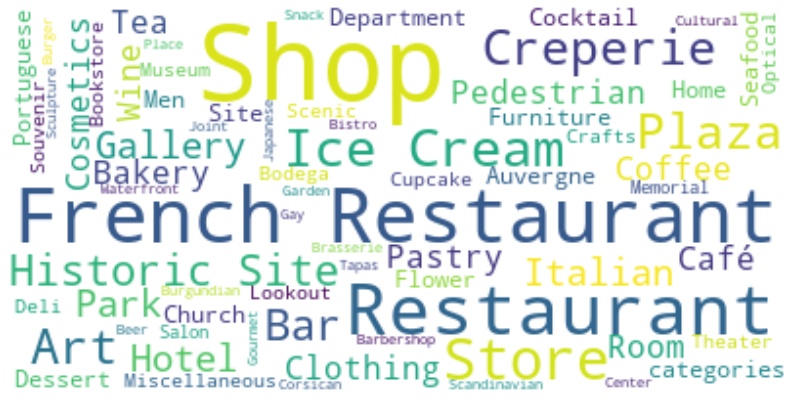

In [53]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height
plt.imshow(tour_eiffel_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [54]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred around Ecco

#colors = [purple, orange, darkred,lightred,beige,darkblue, darkgreen, cadetblue, darkpurple, pink, lightblue, lightgreen,lightgray]
# categories
#

# folium.Marker([lat, lon], popup=str(name)+': '+color+'-'+str(clname), icon=folium.Icon(color=color)).add_to(feature_group)

# add Ecco as a red circle mark
label = folium.Popup('eiffel', parse_html=True)
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    popup=label,
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(venues_map)


# add popular spots to the map as blue circle markers
for lat, lng, name, category in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.name, dataframe_filtered.categories):
    label = '{}, {}'.format(name, category)
    label = folium.Popup(label, parse_html=True)
    folium.features.CircleMarker(
        [lat, lng],
        radius=7,
        popup=label,
        fill=True,
        color= 'green',
        fill_color = 'black',
        fill_opacity=0.6
        ).add_to(venues_map)

# display map
venues_map

In [55]:
url = 'https://api.foursquare.com/v2/venues/trending?client_id={}&client_secret={}&ll={},{}&v={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION)

# send GET request and get trending venues
results = requests.get(url).json()

In [60]:
   
if len(results['response']['venues']) == 0:
    trending_venues_df = 'No trending venues are available at the moment!'
    
else:
    trending_venues = results['response']['venues']
    trending_venues_df = json_normalize(trending_venues)

    # filter columns
    columns_filtered = ['name', 'categories'] + ['location.distance', 'location.city', 'location.postalCode', 'location.state', 'location.country', 'location.lat', 'location.lng']
    trending_venues_df = trending_venues_df.loc[:, columns_filtered]

    # filter the category for each row
    trending_venues_df['categories'] = trending_venues_df.apply(get_category_type, axis=1)

In [61]:
trending_venues_df

'No trending venues are available at the moment!'